In [4]:
import os
import tarfile
import urllib

Download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
Housing_path = os.path.join("datasets","housing")
Housing_url =  Download_root + "datasets/housing/housing.tgz"


datasets/housing


In [2]:
def fetch_data(url=Housing_url,path=Housing_path):
    os.makedirs(Housing_path,exist_ok=True)
    tgz_path = os.path.join(Housing_path,"housing.tgz")
    urllib.request.urlretrieve(Housing_url,tgz_path)
    Housing_tgz = tarfile.open(tgz_path)
    Housing_tgz.extractall(path=Housing_path)
    Housing_tgz.close()

In [5]:
fetch_data()

In [6]:
import pandas as pd
def load_data(path=Housing_path):
    csv_path = os.path.join(Housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

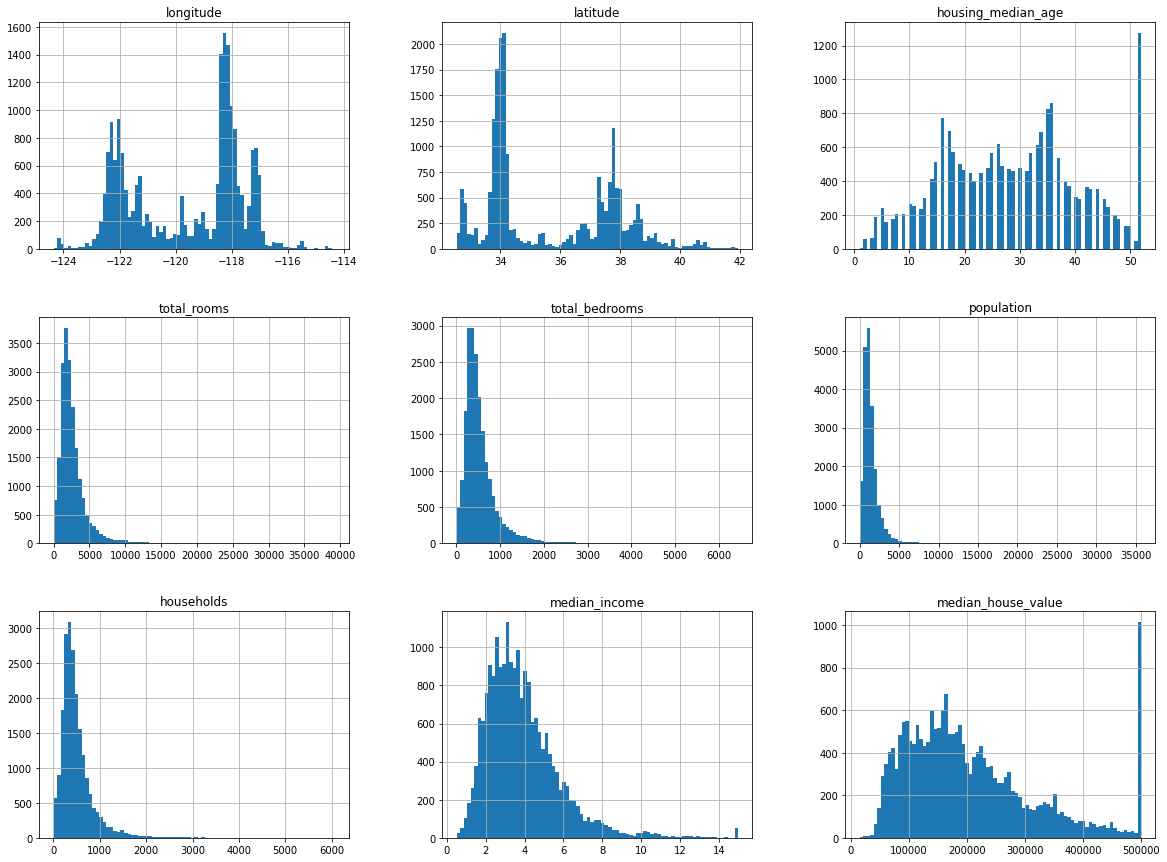

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=80,figsize=(20,15))

In [14]:
import numpy as np
def split_test_data(data=housing,ratio=0.2):
    random_perm  = np.random.permutation(len(data))
    test_set_size = int(len(data)*ratio)
    test_indices = random_perm[:test_set_size]
    train_indices = random_perm[test_set_size:]
    return data.iloc[test_indices],data.iloc[train_indices]

In [15]:
test,train = split_test_data()

In [18]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=43)
for train_idx,test_idx in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_idx]
    strat_test_set = housing.loc[test_idx]

In [23]:
strat_test_set['income_cat'].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

In [24]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop('income_cat',axis=1,inplace=True)

In [26]:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

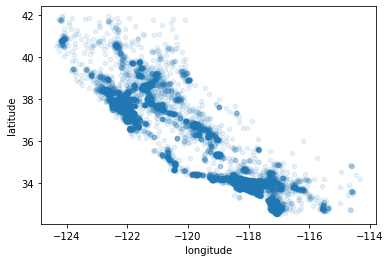

In [30]:
housing.plot(kind='scatter',x = "longitude", y='latitude',alpha=0.1)

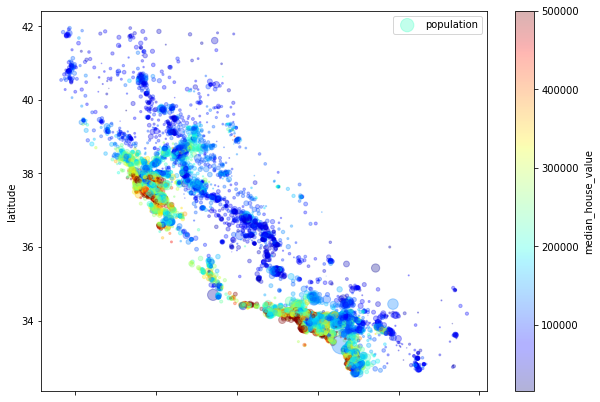

In [36]:
housing.plot(kind='scatter',x = "longitude", y='latitude',alpha=0.3,
s=housing['population']/100, label='population', figsize =(10,7),
c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
plt.legend()